# Final Portfolio Project

## Table of Contents

* [Goals](#goals)
* [Data](#Data)
    * [Loading the Data](#section1_1)
    * [Data Information](#section1_2)
* [Data Cleaning](#cleaning)
* [Exploratory Data Analysis](#EDA)
    * [Big Picture](#section3_1)
    * [Potable DF](#section3_2)
    * [More Purchasing Behavior by Income](#section3_3)
    * [Purchasing Behavior by Education and Income](#section3_4)
    * [Purchasing Behavior by Age](#section3_5)
* [Conclusion](#conclusion)

## Goals

For this project, I have the following goals:
- To create an overview of the data
- To clean the data
- To create questions from the data
- To use statistical and mathematical tools to identify trends and patterns

## Data

The data used here was downloaded from Kaggle:

https://www.kaggle.com/adityakadiwal/water-potability?select=water_potability.csv

For more information on the data, see the Exploratory Data Analysis below.

Inspiration: https://www.kaggle.com/gcmadhan/water-quality-prediction-76-h2o-80-accuracy

### Loading the Data

First, we import some libraries which we will use for this project:

In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Now, let's import the data and give us an overview
df = pd.read_csv("water_potability.csv")
print(df.head())

         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  


### Data Information

Some immediate insights are:
* There are 10 columns and 3276 rows.
* The name and datatype of each column -- most values are floats in this dataset.
* The ph, Sulfate and Trihalomethanes column has missing data, values that are not integers or floats, and an extra space in the column name, so some cleaning will be necessary for this column prior to conducting EDA. 
* Some basic summary statistics on each of the numerical variables.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [4]:
# in some columns there are missing data
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [5]:
print(df.describe())

                ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  


### Content
The water_potability.csv file contains water quality metrics for 3276 different water bodies.

1. pH value:
PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

2. Hardness:
Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

3. Solids (Total dissolved solids - TDS):
Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

4. Chloramines:
Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

5. Sulfate:
Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

6. Conductivity:
Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

7. Organic_carbon:
Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

8. Trihalomethanes:
THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

9. Turbidity:
The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

10. Potability:
Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

## Data Cleaning

- The column names stay the same, because you can handle them through coding
- The columns with missing values have to be replaced with it's mean value
- With a boxplot we search for extreme outliers, which we remove

The data is already pre-processed from kaggle, so we don't have to do any further cleaning

In [6]:
# replacing missing values with it's mean value

df = df.fillna(df.mean())

C:\Users\bhust\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>


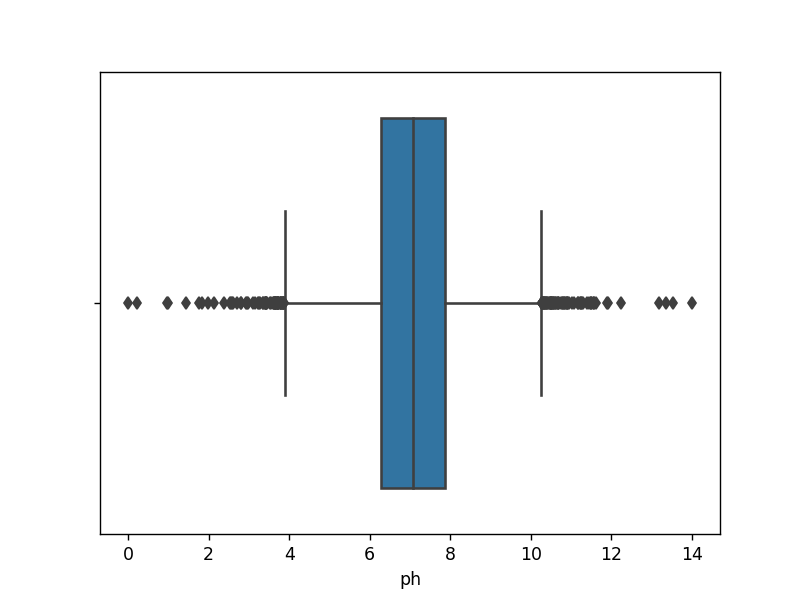

In [7]:
# let's see for outliers
sns.boxplot(df['ph'])
plt.show()

# it seems that all columns look okay, there are no extreme outliers

## Exploratory Data Analysis

After data cleaning, the DataFrame is ready for EDA. I will focus on the values differencies of potable vs. not potable water. I will create two DataFrames, one with all potable values, one with all non-potable values and do some EDA. The goal is to find an answer for following question:

- Which criterias have the most impact on the potability of water? --> Which are the main reason for non-potable water?

### Big Picture

Let's see the overview distribution of all columns from the original DataFrame:

<IPython.core.display.Javascript object>


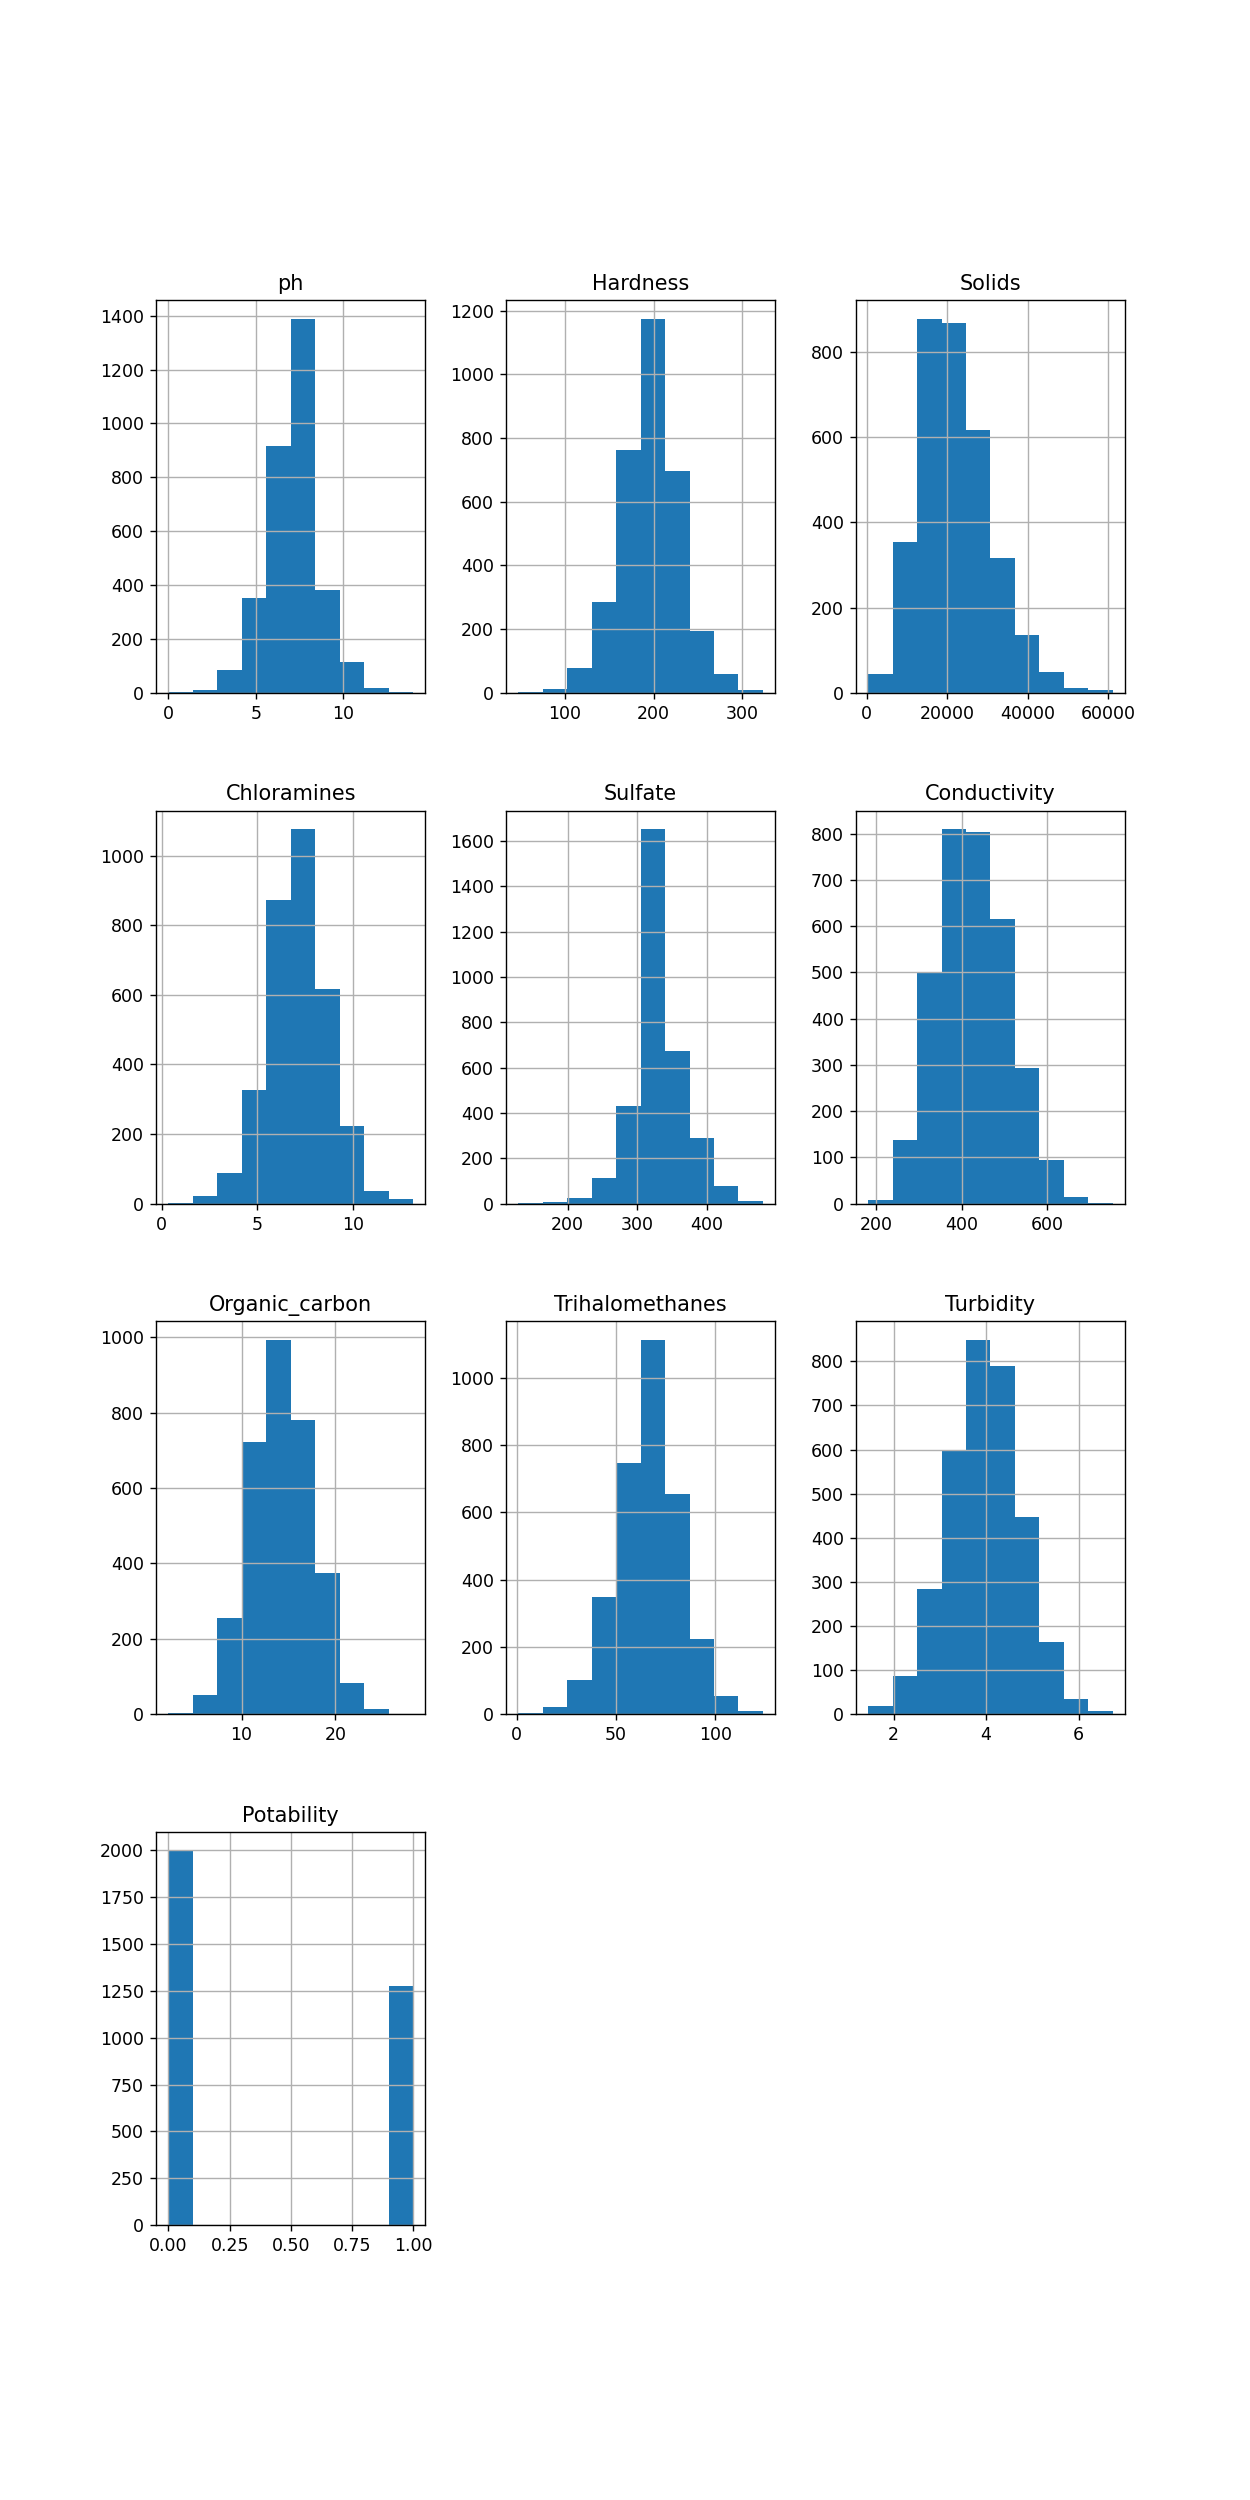

<ipython-input-8-54d53e5f19cc>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax = ax);


In [8]:
fig = plt.figure(figsize = (10,20))
ax = fig.gca()
df.hist(ax = ax);

All columns are symmetric and in 'healthy' shape for an analysis. Except two: Potability has only two bars, because it's an categorical column. And 'Solids' column is a bit right-skewed but it's in a tolerant matter.

In [13]:
# let's create two different DataFrames with the difference in potability:

potable = df[df['Potability'] == 1]
potable.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
250,9.445130,145.805402,13168.529156,9.444471,310.583374,592.659021,8.606397,77.577460,3.875165,1
251,9.024845,128.096691,19859.676476,8.016423,300.150377,451.143481,14.770863,73.778026,3.985251,1
252,7.080795,169.974849,23403.637304,8.519730,333.775777,475.573562,12.924107,50.861913,2.747313,1
253,6.800119,242.008082,39143.403329,9.501695,187.170714,376.456593,11.432466,73.777275,3.854940,1
254,7.174135,203.408935,20401.102461,7.681806,287.085679,315.549900,14.533510,74.405616,3.939896,1


In [14]:
non_potable = df[df['Potability'] == 0]
non_potable.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


### Potable DF

How about going deeper into the potable DF. Find out which are the norms of values for being potable.

In [15]:
potable.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1278 entries, 250 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               1278 non-null   float64
 1   Hardness         1278 non-null   float64
 2   Solids           1278 non-null   float64
 3   Chloramines      1278 non-null   float64
 4   Sulfate          1278 non-null   float64
 5   Conductivity     1278 non-null   float64
 6   Organic_carbon   1278 non-null   float64
 7   Trihalomethanes  1278 non-null   float64
 8   Turbidity        1278 non-null   float64
 9   Potability       1278 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 109.8 KB


In [17]:
potable.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.0
mean,7.074754,195.800744,22383.991018,7.169338,332.844122,425.383800,14.160893,66.533513,3.968328,1.0
std,1.343955,35.547041,9101.010208,1.702988,41.868471,82.048446,3.263907,15.971968,0.780842,0.0
min,0.227499,47.432000,728.750830,0.352000,129.000000,201.619737,2.200000,8.175876,1.492207,1.0
25%,6.351824,174.330531,15668.985035,6.094134,313.052947,360.939023,12.033897,56.911186,3.430909,1.0
50%,7.080795,196.632907,21199.386614,7.215163,333.775777,420.712729,14.162809,66.396293,3.958576,1.0
75%,7.780068,218.003420,27973.236446,8.199261,354.807924,484.155911,16.356245,77.067457,4.509569,1.0
max,13.175402,323.124000,56488.672413,13.127000,481.030642,695.369528,23.604298,124.000000,6.494249,1.0


<IPython.core.display.Javascript object>


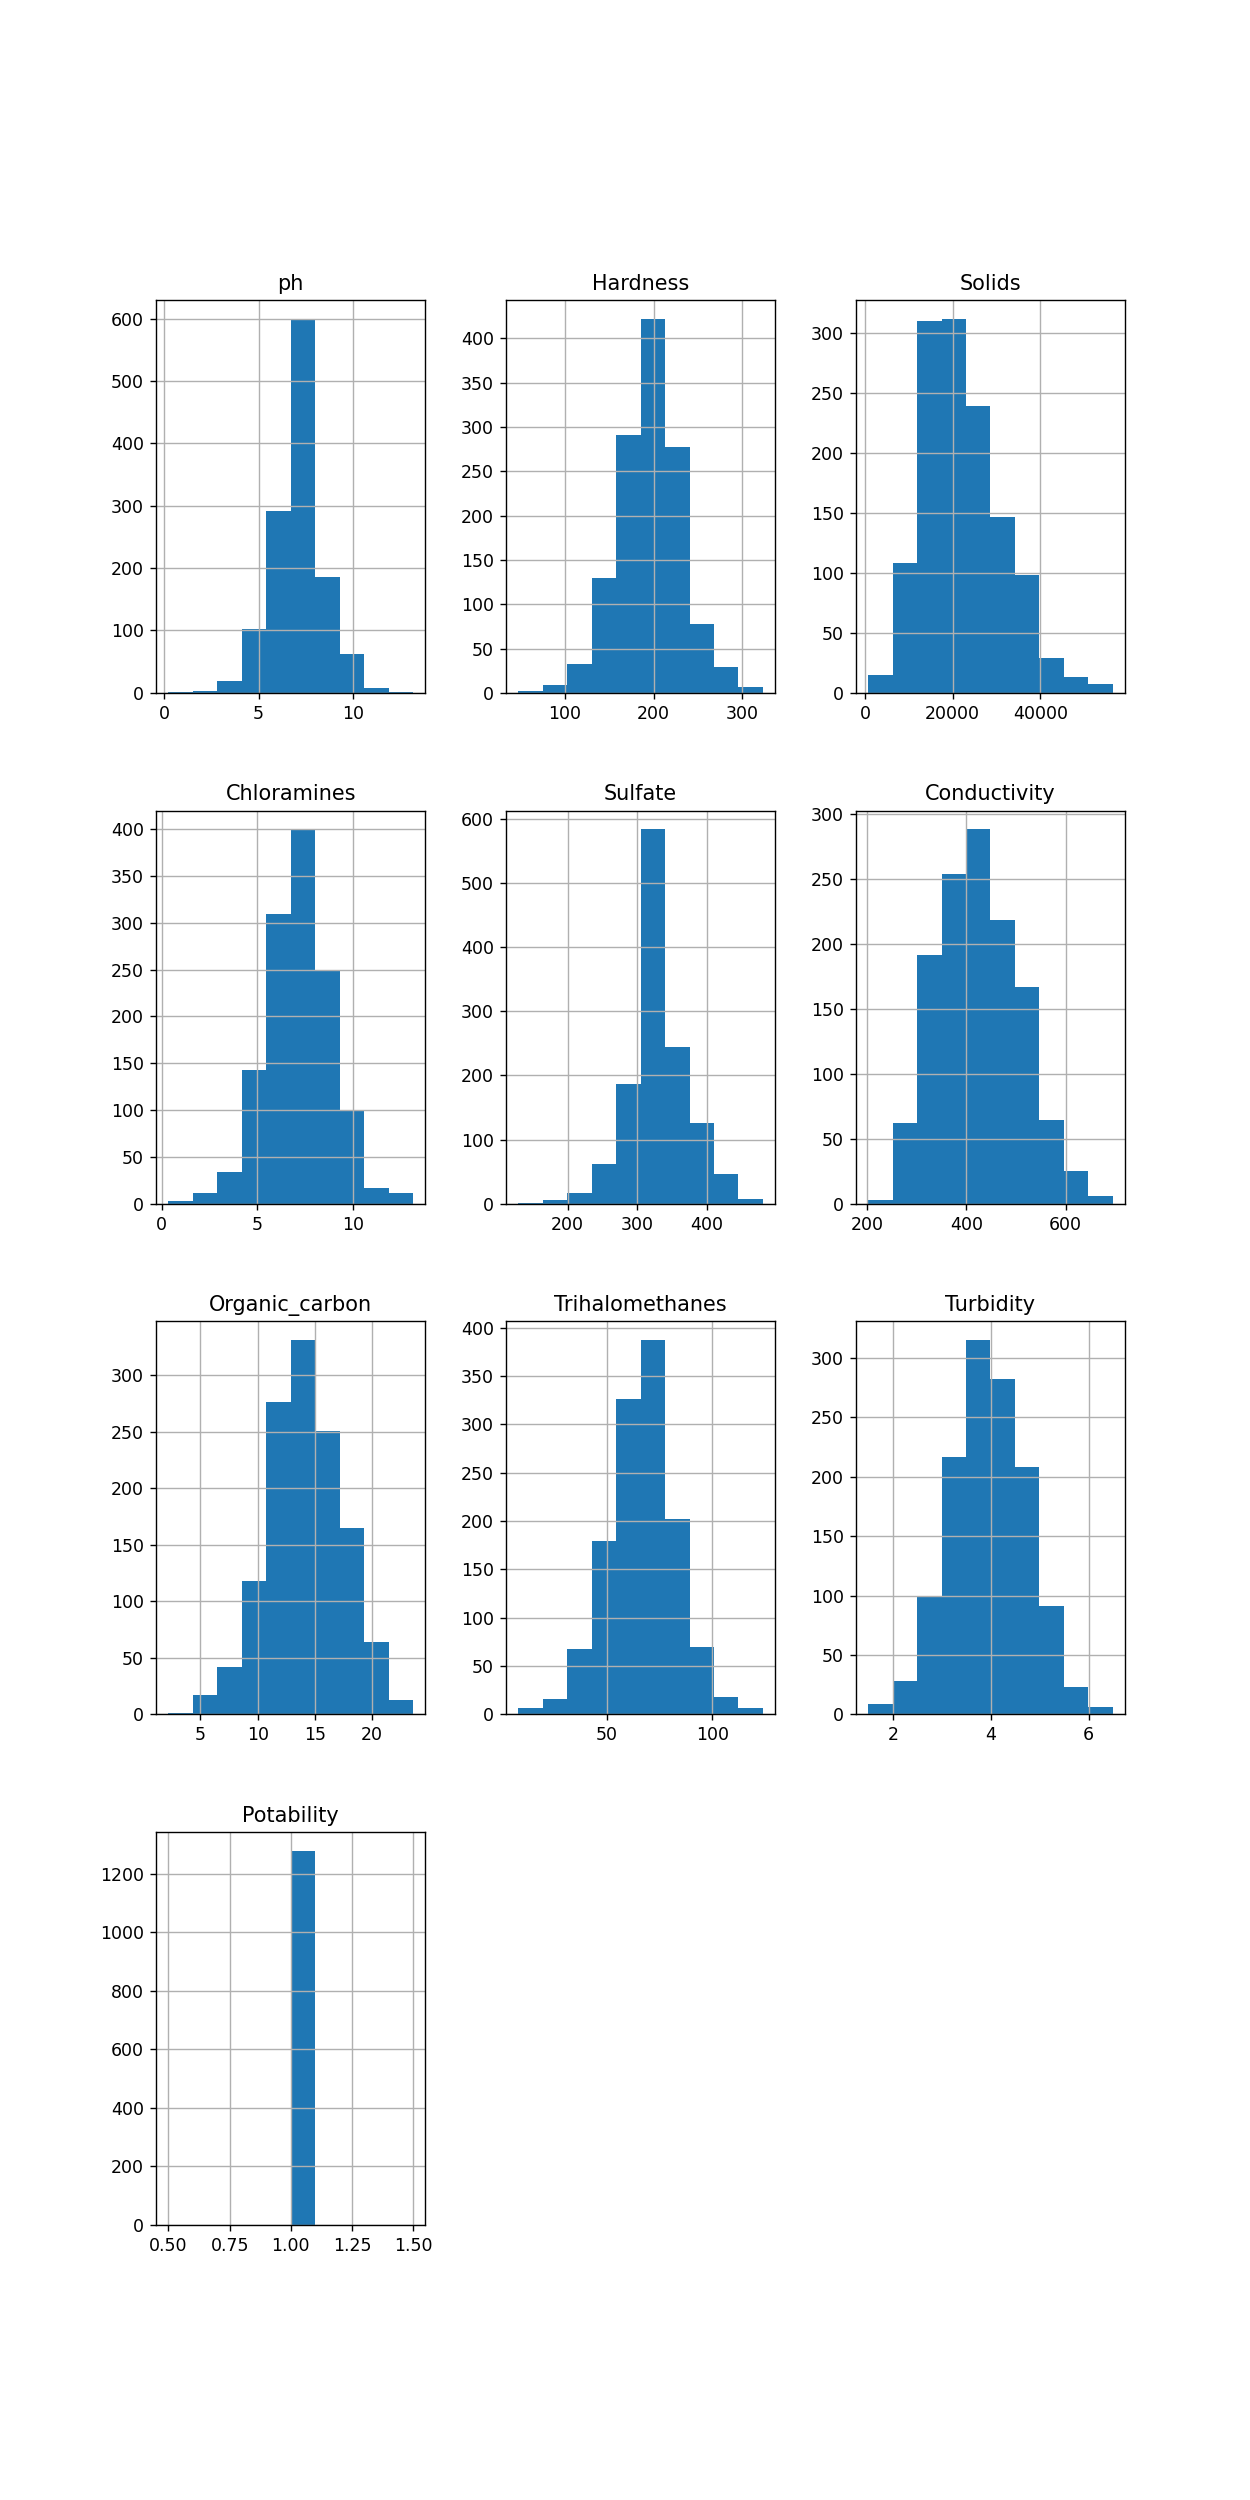

<ipython-input-19-53b8a3e82a04>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  potable.hist(ax = ax);


In [19]:
fig = plt.figure(figsize = (10,20))
ax = fig.gca()
potable.hist(ax = ax);

In [20]:
potable.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,-0.055975,0.088434,0.186285,-0.198500,0.014797,0.022004,0.013819,-0.004054,NaN
Hardness,-0.055975,1.000000,-0.068292,-0.051833,-0.039796,-0.016373,-0.000433,0.022129,0.015485,NaN
Solids,0.088434,-0.068292,1.000000,-0.123785,-0.317554,0.041701,-0.006168,0.013191,0.022553,NaN
Chloramines,0.186285,-0.051833,-0.123785,1.000000,0.063451,-0.023142,-0.024537,0.023512,-0.019341,NaN
Sulfate,-0.198500,-0.039796,-0.317554,0.063451,1.000000,-0.044342,0.037373,-0.072719,-0.019625,NaN
Conductivity,0.014797,-0.016373,0.041701,-0.023142,-0.044342,1.000000,0.038385,0.031324,-0.027973,NaN
Organic_carbon,0.022004,-0.000433,-0.006168,-0.024537,0.037373,0.038385,1.000000,-0.017034,-0.022959,NaN
Trihalomethanes,0.013819,0.022129,0.013191,0.023512,-0.072719,0.031324,-0.017034,1.000000,-0.029715,NaN
Turbidity,-0.004054,0.015485,0.022553,-0.019341,-0.019625,-0.027973,-0.022959,-0.029715,1.000000,NaN
Potability,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>


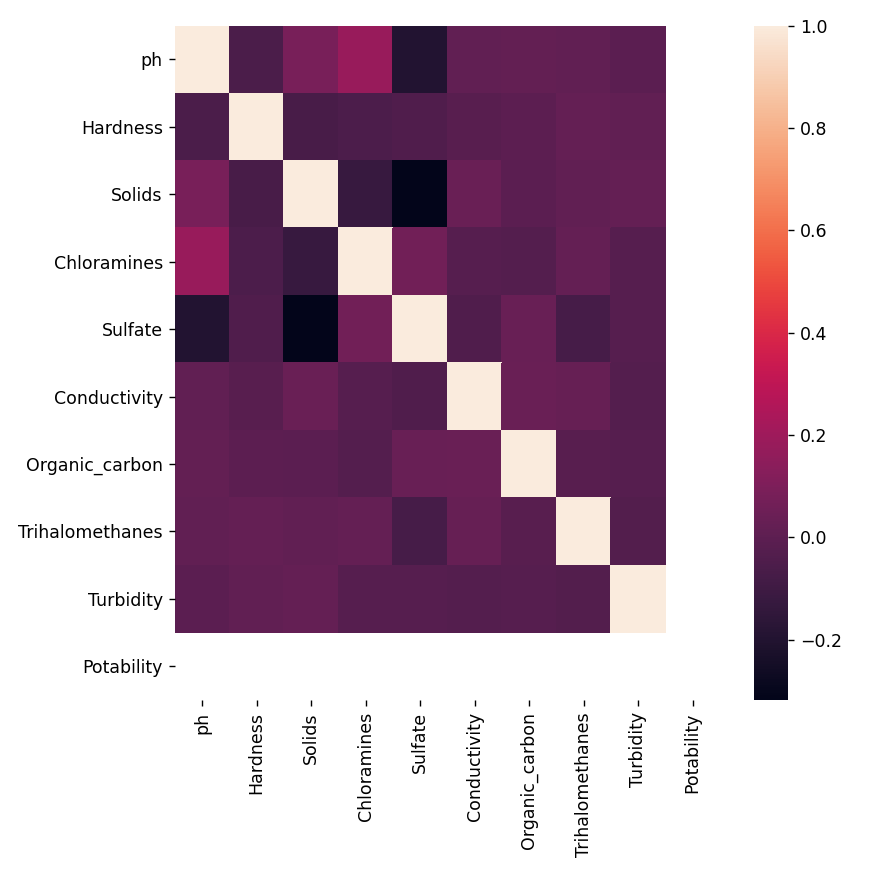

In [23]:
plt.figure(figsize=(7,7))
# heat matrix that shows correlation across all numerical variables
sns.heatmap(data=potable.corr(),annot=False)
plt.tight_layout()
plt.show()

### Non-Potable DF

Dive deeper into the metrics of non-potable water.

In [24]:
non_potable.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1998 entries, 0 to 3116
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               1998 non-null   float64
 1   Hardness         1998 non-null   float64
 2   Solids           1998 non-null   float64
 3   Chloramines      1998 non-null   float64
 4   Sulfate          1998 non-null   float64
 5   Conductivity     1998 non-null   float64
 6   Organic_carbon   1998 non-null   float64
 7   Trihalomethanes  1998 non-null   float64
 8   Turbidity        1998 non-null   float64
 9   Potability       1998 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 171.7 KB


In [25]:
non_potable.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.0
mean,7.084658,196.733292,21777.490788,7.092175,334.371700,426.730454,14.364335,66.308522,3.965800,0.0
std,1.545490,31.057540,8543.068788,1.501045,31.943667,80.047317,3.334554,15.642636,0.780282,0.0
min,0.000000,98.452931,320.942611,1.683993,203.444521,181.483754,4.371899,0.738000,1.450000,0.0
25%,6.224046,177.823265,15663.057382,6.155640,319.354715,368.498530,12.101057,56.441831,3.444062,0.0
50%,7.080795,197.123423,20809.618280,7.090334,333.775777,422.229331,14.293508,66.396293,3.948076,0.0
75%,7.940697,216.120687,27006.249009,8.066462,348.316746,480.677198,16.649485,76.518849,4.496106,0.0
max,14.000000,304.235912,61227.196008,12.653362,460.107069,753.342620,28.300000,120.030077,6.739000,0.0


<IPython.core.display.Javascript object>


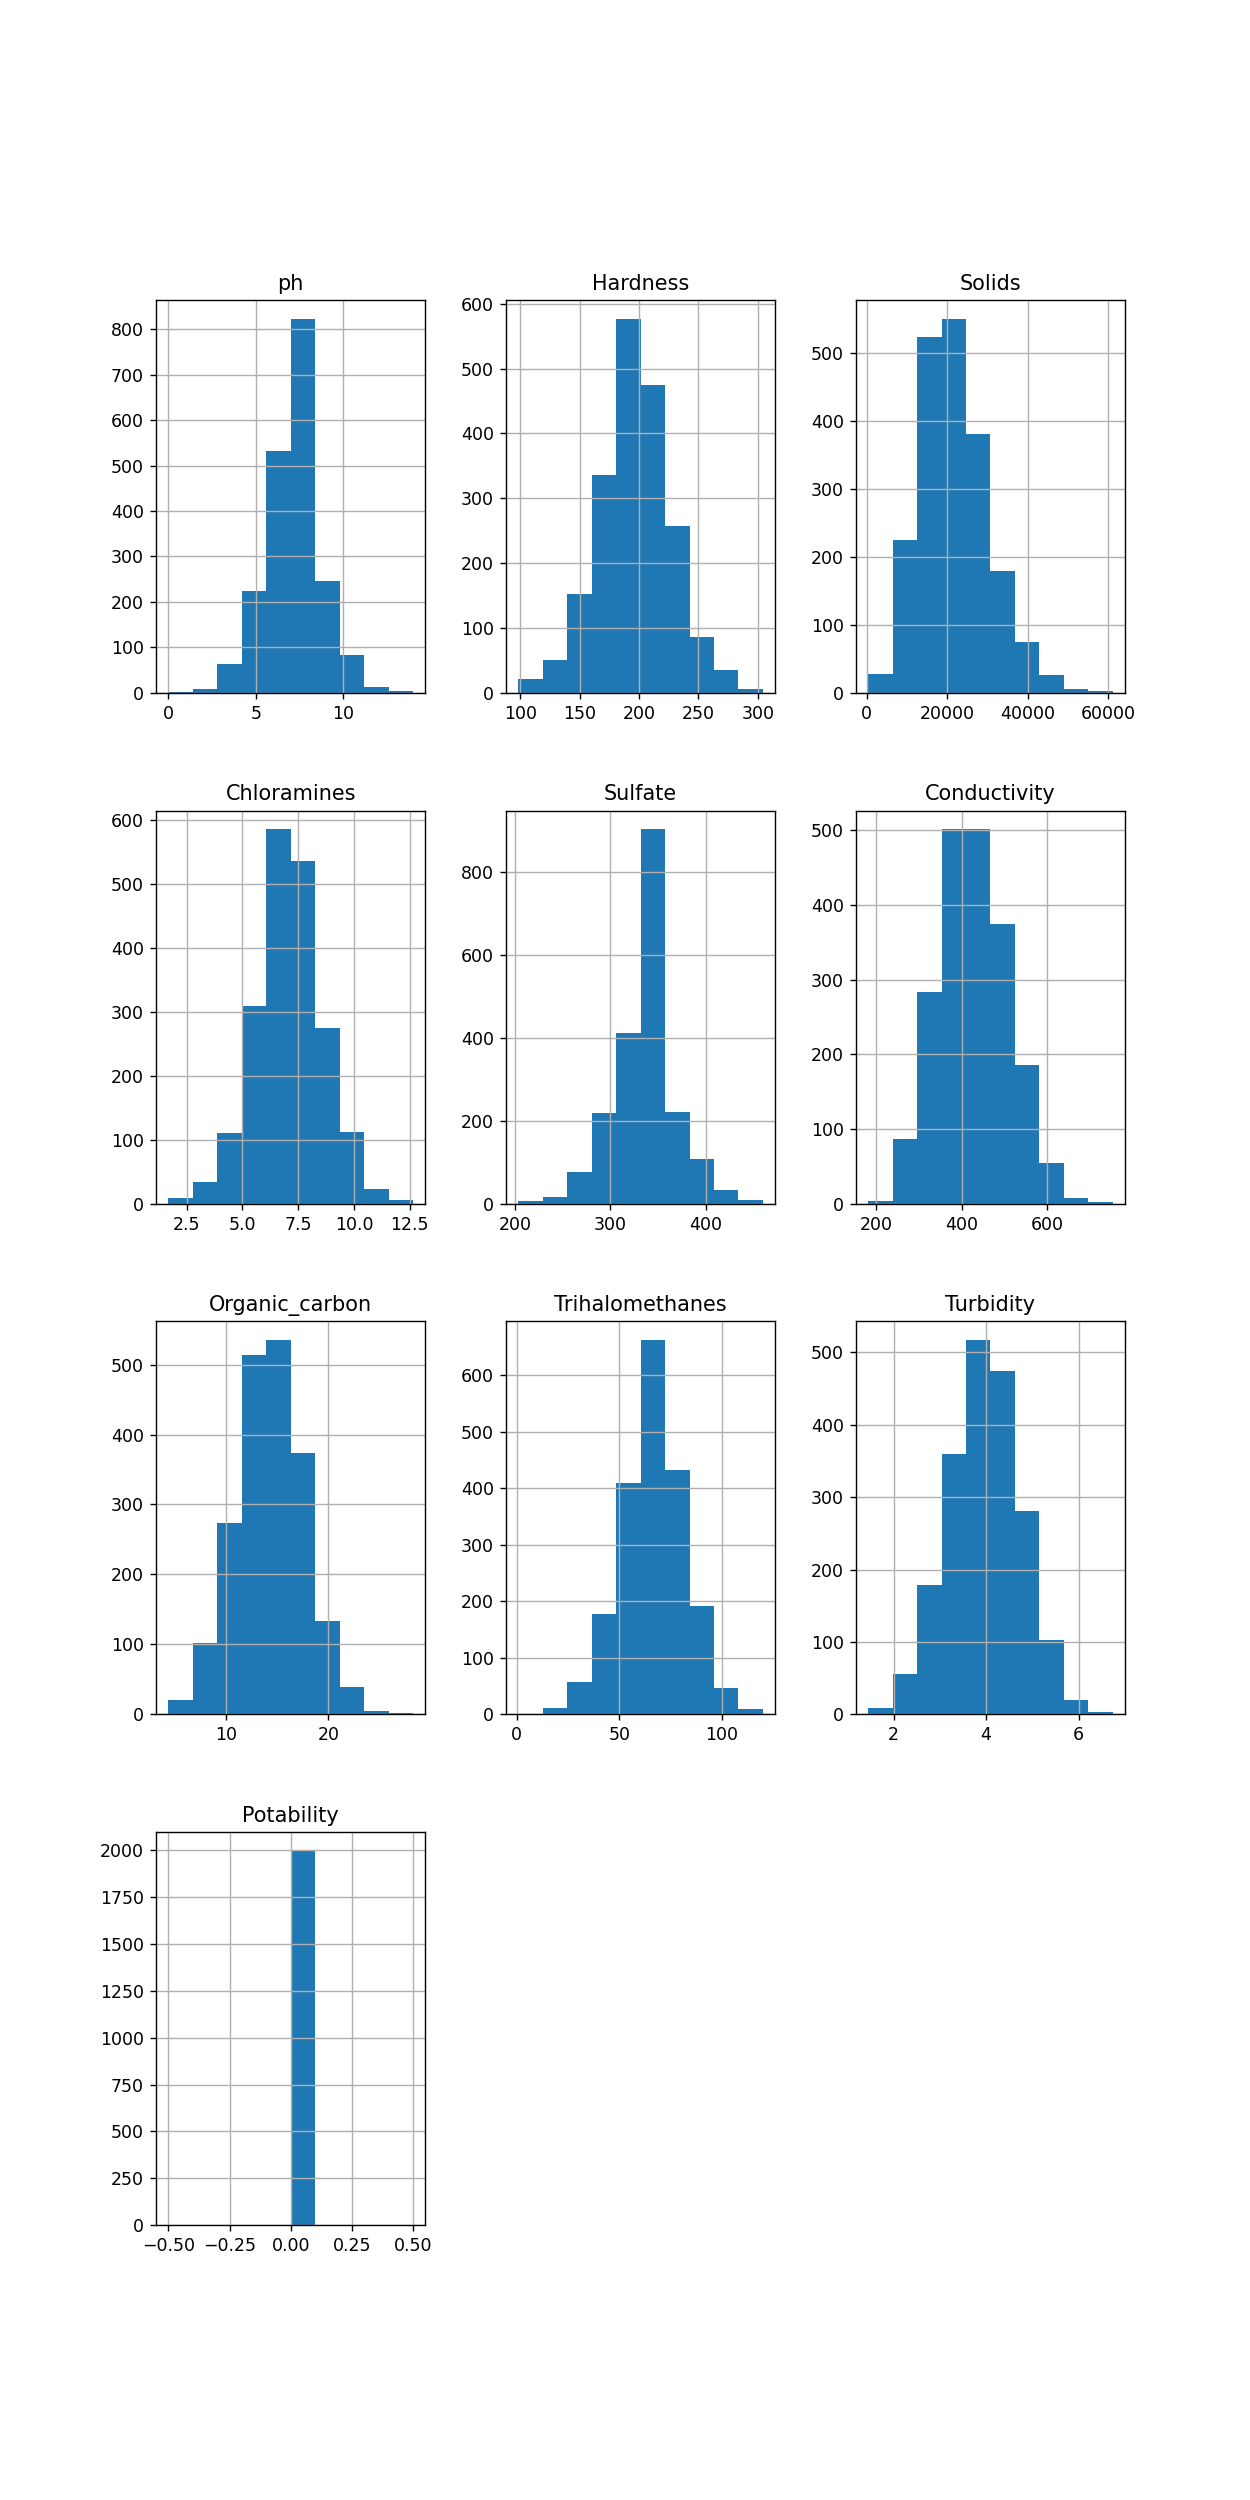

<ipython-input-26-85b0a6861927>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  non_potable.hist(ax = ax);


In [26]:
fig = plt.figure(figsize = (10,20))
ax = fig.gca()
non_potable.hist(ax = ax);

In [27]:
non_potable.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.160776,-0.183304,-0.169727,0.169974,0.018600,0.049864,-0.003102,-0.054242,NaN
Hardness,0.160776,1.000000,-0.029496,-0.011389,-0.144614,-0.029837,0.005813,-0.038580,-0.036393,NaN
Solids,-0.183304,-0.029496,1.000000,-0.030284,-0.000510,-0.005145,0.022908,-0.024634,0.017441,NaN
Chloramines,-0.169727,-0.011389,-0.030284,1.000000,-0.012818,-0.018230,-0.003064,0.011286,0.018065,NaN
Sulfate,0.169974,-0.144614,-0.000510,-0.012818,1.000000,0.011440,0.017737,0.014603,-0.001648,NaN
Conductivity,0.018600,-0.029837,-0.005145,-0.018230,0.011440,1.000000,0.009416,-0.018774,0.027972,NaN
Organic_carbon,0.049864,0.005813,0.022908,-0.003064,0.017737,0.009416,1.000000,-0.010054,-0.029978,NaN
Trihalomethanes,-0.003102,-0.038580,-0.024634,0.011286,0.014603,-0.018774,-0.010054,1.000000,-0.016156,NaN
Turbidity,-0.054242,-0.036393,0.017441,0.018065,-0.001648,0.027972,-0.029978,-0.016156,1.000000,NaN
Potability,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>


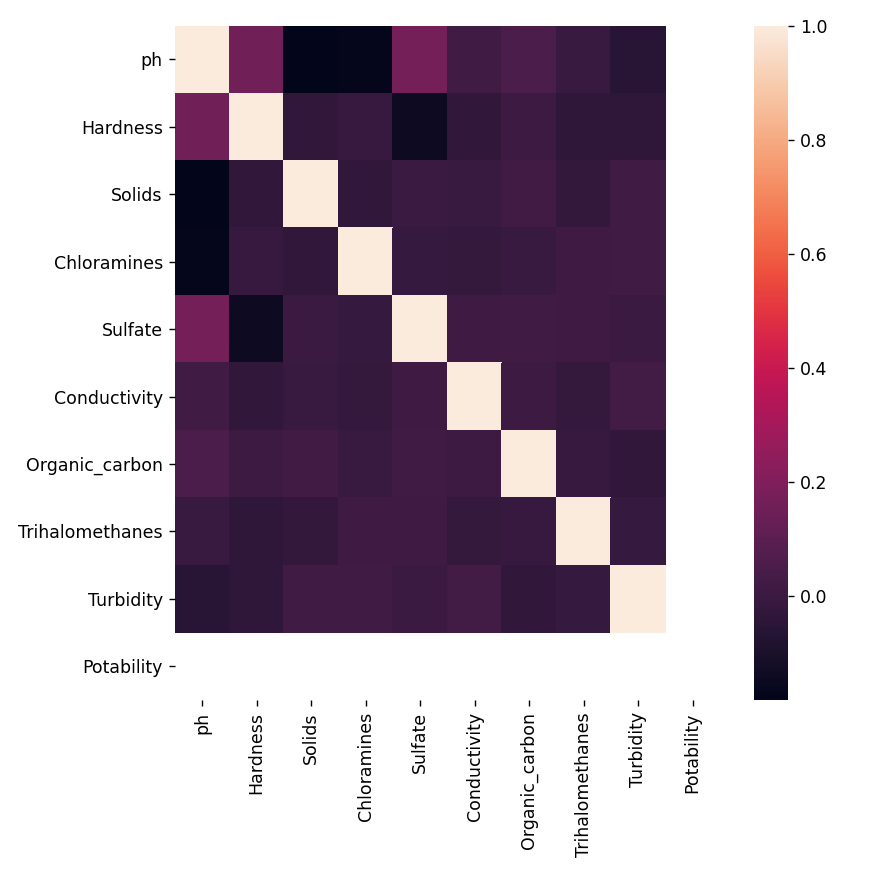

In [28]:
plt.figure(figsize=(7,7))
# heat matrix that shows correlation across all numerical variables
sns.heatmap(data=non_potable.corr(),annot=False)
plt.tight_layout()
plt.show()